____

# Homework 3

___

#### Package Imports

In [111]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, precision_score, accuracy_score, homogeneity_completeness_v_measure, homogeneity_score
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.grid_search import GridSearchCV
from sklearn import feature_selection
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

____

## Problem 1 
For this problem you will experiment with linear regression models to make predictions with numerical data. You will
also explore more systematic methods for feature selection and for optimizing model parameters (model selection).
The data set you will use is a subset of the "Communities and Crime" data set that combines information from the
1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the
description and statistics on different variables. The target attribute for regression purposes is
"ViolentCrimesPerPop". The two identifier attributes "state" and "community name" should be excluded for the
regression task.

In [2]:
#Import data
url = r'https://raw.githubusercontent.com/PixarJunkie/dsc478-programming-ml-applications/master/data/communities-data/communities.csv'
df = pd.read_csv(url)

### Problem 1a 
Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from
scikit-learn. The provided data is already normalized (see description), so there is no need for
additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.)
for each of the variables in the data set. Separate the target attribute for regression.

In [3]:
#Remove ?
df = df[df.OtherPerCap != '?']
#Seperate target variable and drop state/communityname
target = df.ViolentCrimesPerPop
df.drop(columns = ['ViolentCrimesPerPop', 'state', 'communityname'], axis = 1, inplace = True)

In [4]:
#Basic stats
df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,0.336297,0.423086,...,0.029453,0.022790,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741
std,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,0.166540,0.179196,...,0.102630,0.100424,0.231146,0.204314,0.181360,0.200520,0.198253,0.109485,0.203127,0.229099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.000000,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.000000,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.010000,0.000000,0.280000,0.770000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.3, random_state = 23)
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (1395, 97)
X_test shape: (598, 97)
y_train shape: (1395,)
y_test shape: (598,)


____

### Problem 1b 
Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the
RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of
the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold crossvalidation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should
use the KFoldmodule from sklearn.cross_validation).

In [6]:
#Base model
reg = LinearRegression()
#Fit model
model = reg.fit(X_train, y_train)
train_preds = model.predict(X_train)
#Training rmse
print('Training RMSE = ' + str(np.sqrt(mean_squared_error(train_preds, y_train))))
print('Regression coeff: ' + str(model.coef_))

Training RMSE = 0.12706984575174946
Regression coeff: [ 0.18180384 -0.02456446  0.19336785 -0.0692231   0.02402757  0.10533693
  0.10651976 -0.28684654 -0.00450859  0.15568013 -0.34153117  0.05689896
 -0.31278512 -0.17418009  0.05200266 -0.20547294 -0.05745159  0.0418954
 -0.06378795  0.41571875  0.16334943 -0.35312853 -0.0255256  -0.04713248
  0.02572615  0.05822205  0.02050493  0.16697108 -0.18455236 -0.04589169
  0.04642044  0.05984499 -0.00723915  0.16686814 -0.01012395  0.00999885
  0.70361587  0.16266403  0.5734757  -1.13766631 -0.41501933 -0.01946235
 -0.19851608 -0.0338486  -0.0116426   0.05942284 -0.16889839 -0.20970299
  0.17295796 -0.1320901   0.02803919  0.05267064 -0.12199557  0.04132845
  0.01107641 -0.33486353  0.45899263 -0.11096538  0.0702354  -0.08814446
  0.23000182 -0.30240472  0.55610593  0.30003273 -0.31591065 -1.2280806
  0.15916502  0.05334984  0.02512211  0.22149232 -0.02516277  1.15062278
  0.02449627 -0.06814524 -0.05416636  0.01070542 -0.02373715 -0.38539679

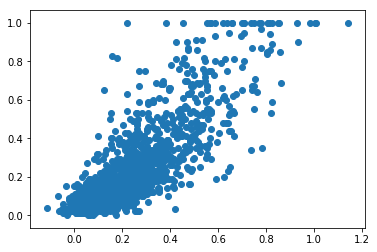

In [7]:
#Training preds vs. actual
plt.scatter(train_preds, y_train)

In [8]:
#Cross-validation
cv_10f = cross_val_score(reg, X_train, y_train, cv = 10)
print('cv scores: ' + str(cv_10f))
#Cross-validation preds
cv_10f_preds = cross_val_predict(reg, X_train, y_train, cv = 10)

cv scores: [0.66115654 0.67181177 0.59008449 0.6258997  0.63665183 0.61778658
 0.71202608 0.55823714 0.54092493 0.6308973 ]


In [9]:
#Cross-validation RMSE through mean_squared_error module
kf = KFold(len(X_train), n_folds = 10)
x_val = 0
for train_ind, test_ind in kf:
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    err = pred - y_test
    x_val += np.sqrt(np.dot(err, err) / len(X_test))
       
cv_10f_kf = x_val / 10
print('kf_MSE: ' + str(cv_10f_kf))

#Cross-validation RMSE through mean_squared_error module
print('cv_mse RMSE: ' + str(np.sqrt(mean_squared_error(cv_10f_preds, y_train))))

kf_MSE: 0.13883607250349875
cv_mse RMSE: 0.13932669369452322


_____

### Problem 1c 
Feature Selection: use the scikit-learn regression model from sklearn.linear_model with a subset
of features to perform linear regression. For feature selection, write a script or function that takes as input
the training data, target variable; the model; and any other parameters you find necessary, and returns the
optimal percentage of the most informative features to use. Your approach should use k-fold crossvalidation on the training data (you can use k=5). You can
use feature_selection.SelectPercentile to find the most informative variables. Show the list of
most informative variables and their weights Note: since this is regression not classification, you should
use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean
absolute error values on cross-validation relative to the percentage of selected features (See scikitlearn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with
regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. Review scikitlearn documentation for feature selection

In [20]:
def best_feats(train_data, train_labels, model_):
    opt_feats = []
    perc = list(range(1, 100, 1))
    for i in range(1, 100, 1):
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = i)
        train_fs = fs.fit_transform(train_data, train_labels)
        scores = abs(cross_val_score(model_, train_fs, train_labels, scoring = 'mean_absolute_error', cv = 5))
        opt_feats = np.append(opt_feats, scores.mean())
    opt_perc = np.where(opt_feats == opt_feats.max())[0]
    opt_num = int(perc[opt_perc[0]] * len(train_data.columns) / 100)
    return opt_perc[0], opt_num

In [23]:
#Get perc and num for features
best = best_feats(X_train, y_train, LinearRegression())

#Fit opt_perc from best 
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = best[0])
train_fs = fs.fit(X_train, y_train)
scores = abs(cross_val_score(LinearRegression(), X_train, y_train, scoring = 'mean_absolute_error', cv = 5))

#Create new df with feature indexes
cols = train_fs.get_support()
col_names = list(X_train.columns[cols])
features_df_train = X_train[col_names]
features_df_test = X_test[col_names]

In [12]:
#RSME with subset df on top featues
#Cross-validation RMSE through mean_squared_error module
kf = KFold(len(features_df_train), n_folds = 10)
x_val = 0
for train_ind, test_ind in kf:
    reg.fit(features_df_train, y_train)
    pred = reg.predict(features_df_test)
    err = pred - y_test
    x_val += np.sqrt(np.dot(err, err) / len(features_df_test))
       
cv_10f_kf = x_val / 10
print('kf_MSE: ' + str(cv_10f_kf))

#Cross-validation RMSE through mean_squared_error module
print('cv_mse RMSE: ' + str(np.sqrt(mean_squared_error(cv_10f_preds, y_train))))

kf_MSE: 0.1414994701879717
cv_mse RMSE: 0.13932669369452322


_____

### Problem 1d 
Next, perform Ridge Regression and Lasso Regression using the modules
from sklearn.linear_model. In each case, perform systematic model selection to identify the
optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion;
the model selection process should be performed using the 80% training data partition. You should create a
function that takes as input the data and target variable; the parameter to vary and a list of its values; the
model to be trained; and any other relevant input needed to determine the optimal value for the specified
parameter. The model selection process should perform k-fold cross validation (k should be a parameter, 
but you can select k=5 for this problem). You should also plot the error values on the training and crossvalidation splits across the specified values of the alphaparameter. Finally, using the best alpha value,
run the model on the set-aside test data. Discuss your observation and conclusions.

In [86]:
#Ridge regression (using the same train/test data from the prior parts)
def ridge_lasso(data, label, model_, param, param_range):
    #Ridge
    if model_ == 1:
        results = []
        #Test params in param_range
        for num in param_range:
            #Base model
            rr = Ridge(alpha = num)
            #Cv with scores
            rr_cv_scores = abs(cross_val_score(rr, data, label, scoring = 'mean_absolute_error', cv = 5))
            #Add to results
            if len(results) == 0:
                results.extend([num, rr_cv_scores.max()])
            #Replace results with better cv score
            elif rr_cv_scores.max() > results[1]:
                results = [num, rr_cv_scores.max()]
        best_rr = Ridge(alpha = results[0])
        best_model = best_rr.fit(data, label)
        print(results)
    
    #Lasso
    if model_ == 0:
        results = []
        #Test params in param_range
        for num in param_range:
            #Base model
            lm = Lasso(alpha = num)
            #Cv with scores
            lm_cv_scores = abs(cross_val_score(lm, data, label, scoring = 'mean_absolute_error', cv = 5))
            #Add to results
            if len(results) == 0:
                results.extend([num, lm_cv_scores.max()])
            #Replace results with better cv score
            elif lm_cv_scores.max() > results[1]:
                results = [num, lm_cv_scores.max()]
        best_lm = Lasso(alpha = results[0])
        best_model = best_lm.fit(data, label)
        print(results)
    #Return model
    return best_model

In [87]:
#Ridge model and RMSE
model = ridge_lasso(X_train, y_train, 1, 'aplha', list(np.linspace(0.1, 1, 10)))
preds = model.predict(X_test)
print('RMSE: ' + str(np.sqrt(mean_squared_error(preds, y_test))))
print(' ')

#Lasso model and RMSE
model = ridge_lasso(X_train, y_train, 0, 'aplha', list(np.linspace(0.1, 1, 20)))
preds = model.predict(X_test)
print('RMSE: ' + str(np.sqrt(mean_squared_error(preds, y_test))))

[0.1, 0.1036798487480546]
RMSE: 0.13753920468232295
 
[0.1, 0.18164229005279992]
RMSE: 0.24213965360863646


___

##### Discussion 
From looking at the RMSE between the two models it appears that Lasso performs better in this case. I would also look into the accuracy, percision, and AUC curves of both models before making the final decision. I was surprised to see that in both cases the best alpha was the one that had the best cv score.

_____

#### Problem 1e 
Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use
the SGDRegessor module from sklearn.linear_model. Again, start by a creating randomized 80%-
20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by
standard deviation). Prior to fiting the model, perform the scaling
using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search
(using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of
two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the
default to relatively large values, say 10). Using the best parameters, apply the model to the set-aside test
data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using
SGDRegressor with the "elasticnet" penalty parameter. Note: "l1_ratio" is The Elastic Net mixing
parameter, with 0 <= l1_ratio <= 1; l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults
to 0.15. Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a
summary of your findings from the above experiments.

In [111]:
#Scale data
scaler = StandardScaler()
X_train_fit = scaler.fit_transform(X_train)
X_test_fit = scaler.fit_transform(X_test)

#params for gridsearch
params = {'penalty': ['l2', 'l1'], 'alpha': [0.0001, 0.1, 1, 4, 6, 9]}
#Base SGD model
sgd = SGDRegressor()
#Gridsearch model
gs = GridSearchCV(sgd, param_grid = params)
#Fit gs to X_train_fit
gs_model = gs.fit(X_train_fit, y_train)
#Predict X_test_fit gs to test data
gs_preds = gs_model.predict(X_test_fit)
print(gs.best_params_, gs.best_score_)
print('RMSE ' + str(mean_squared_error(gs_preds, y_test)))

##params for gridsearch
params = {'penalty': ['l1'], 'alpha': [0.0001, 0.1, 1, 4, 6, 9], 'l1_ratio': list(np.linspace(0.1, 1, 20))}
sgd = SGDRegressor()
#Gridsearch model
gs = GridSearchCV(sgd, param_grid = params)
#Fit gs to X_train_fit
gs_model = gs.fit(X_train_fit, y_train)
#Predict X_test_fit gs to test data
gs_preds = gs_model.predict(X_test_fit)
print(' ')
print(gs.best_params_, gs.best_score_)
print('RMSE ' + str(mean_squared_error(gs_preds, y_test)))

{'alpha': 0.0001, 'penalty': 'l1'} 0.6202439592221028
RMSE 0.019189902116753508
 
{'alpha': 0.0001, 'l1_ratio': 0.7157894736842105, 'penalty': 'l1'} 0.6217674459250742
RMSE 0.02162733245999105


___

##### Discussion 
There doesn't appear to be much of a difference when varying the 'l1_ratio' and leaving it at the default 0.15. In fact, the best scores between the two best scores was trivial.

___

## Problem 2 
For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2 (see
the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts),
each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The
documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file
"terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual
category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform
clustering on the documents and compare the clusters to the actual categories.

___

In [2]:
#Import data
doc_classes = pd.read_csv(r'https://raw.githubusercontent.com/PixarJunkie/dsc478-programming-ml-applications/master/data/news-groups-data/classes.txt', sep = ' ', header = None, names = ['id', 'doc_class'])
doc_classes.drop(columns = ['id'], inplace = True)
doc_classes = doc_classes.doc_class.values
term_matrix = np.loadtxt(r'https://raw.githubusercontent.com/PixarJunkie/dsc478-programming-ml-applications/master/data/news-groups-data/matrix.txt', delimiter = ',')
terms = pd.read_csv(r'https://raw.githubusercontent.com/PixarJunkie/dsc478-programming-ml-applications/master/data/news-groups-data/terms.txt', sep = ' ', header = None, names = ['term'])

___

### Problem 2a 
Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity.
This is the distance function you will use to pass to the kMeans function.

In [3]:
#Cosine similarity
def cos_sim(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

___

### Problem 2b 
Load the data set Note: the data matrix provided has terms as rows and documents as columns.
Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main
data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the
transpose. Then, split the data set (the document x term matrix) and set aside 20% for later use (see
below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.


In [4]:
#Transpose term_matrix
term_matrix_t = term_matrix.T

#Train test split
terms_train, terms_test, label_train, label_test = train_test_split(term_matrix_t, doc_classes, test_size = 0.20, random_state = 23)
print('terms_train shape: ' + str(terms_train.shape))
print('terms_test shape: ' + str(terms_test.shape))
print('label_train shape: ' + str(label_train.shape))
print('label_test shape: ' + str(label_test.shape))

terms_train shape: (2000, 9328)
terms_test shape: (500, 9328)
label_train shape: (2000,)
label_test shape: (500,)


___

### Problem 2c 
Perform Kmeans clustering on the training data. Write a function to display the top N terms in each
cluster along with the cluster DF values for each term and the size of the cluster. The cluster DF value
for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster
has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game"
in that cluster is 0.2 or 20%). Sort the terms for each cluster in decreasing order of the DF percentage.
Here is an example of how this output might look like (here the top 10 terms for 3 of the 5 clusters
are displayed in decreasing order of cluster DF values, but the mean frequnecy from the cluster centroid
is also shown). Extra Credit: use your favorite third party tool, ideally with a Python based API, to
create a word cloud for each cluster.


In [7]:
def randCent(dataSet, k):
	n = dataSet.shape[1]
	centroids = np.zeros((k,n), dtype=float)
	for j in range(n): #create random cluster centers
		minJ = min(dataSet[:,j])
		rangeJ = float(max(dataSet[:,j]) - minJ)
		centroids[:,j] = minJ + rangeJ * np.random.rand(k)
	return centroids 

def kMeans(dataSet, k, distMeas=cos_sim, createCent=randCent):
    m = dataSet.shape[0]
    clusterAssment = np.zeros((m,2))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = np.inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = np.mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

def biKmeans(dataSet, k, distMeas=cos_sim):
    m = dataSet.shape[0]
    clusterAssment = mat(np.zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    for j in range(m): #calc initial Error
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = np.inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:,0].A==i)[0],:] #get the data points currently in cluster i
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1])#compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[np.nonzero(clusterAssment[:,0].A!=i)[0],1])
            print ("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[np.nonzero(bestClustAss[:,0] == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[np.nonzero(bestClustAss[:,0] == 0)[0],0] = bestCentToSplit
        print ('the bestCentToSplit is: ',bestCentToSplit)
        print ('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]#replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[np.nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#reassign new clusters, and SSE
    return mat(centList), clusterAssment

When I run the below cell it loops forever and never finishes. I went ahead and compelted the other probelms with the base Kmeans though it's not utilizing the cosine similarity as the distance measure.

In [ ]:
#kmeans model
kMeans(terms_train, 5)

In [51]:
#Create kmeans model and fit to training set
k = 5
km = KMeans(n_clusters = k)
km_model = km.fit(terms_train)

In [54]:
#Create dataframe from clusters
cluster_df = pd.DataFrame(terms_train)
cluster_df['cluster'] = km_model.labels_

#Print size of each cluster
for i in range(0, k):
    print(len(cluster_df[cluster_df.cluster == i]))

1995
1
2
1
1


In [108]:
#Get frequency and index
top_5_0 = cluster_df[cluster_df.cluster == 0].sum().sort_values(ascending = False).head()
top_5_1 = cluster_df[cluster_df.cluster == 1].sum().sort_values(ascending = False).head()
top_5_2 = cluster_df[cluster_df.cluster == 2].sum().sort_values(ascending = False).head()
top_5_3 = cluster_df[cluster_df.cluster == 3].sum().sort_values(ascending = False).head()
top_5_4 = cluster_df[cluster_df.cluster == 4].sum().sort_values(ascending = False).head()

#Create df for each cluster and join to terms df
top_0_df = pd.DataFrame({'index': list(top_5_0.index), 'frequency': list(top_5_0)})
top_1_df = pd.DataFrame({'index': list(top_5_1.index), 'frequency': list(top_5_1)})
top_2_df = pd.DataFrame({'index': list(top_5_2.index), 'frequency': list(top_5_2)})
top_3_df = pd.DataFrame({'index': list(top_5_3.index), 'frequency': list(top_5_3)})
top_4_df = pd.DataFrame({'index': list(top_5_4.index), 'frequency': list(top_5_4)})

#Create index column in terms df
terms['index'] = terms.index

#Merge dataframes
top_0_df = pd.merge(top_0_df, terms)
top_1_df = pd.merge(top_1_df, terms)
top_2_df = pd.merge(top_2_df, terms)
top_3_df = pd.merge(top_3_df, terms)
top_4_df = pd.merge(top_4_df, terms)

print(top_0_df)
print(top_1_df)
print(top_2_df)
print(top_3_df)
print(top_4_df)

   index  frequency     term
0   7895     2149.0  subject
1   5795     1541.0       on
2   9129     1266.0    write
3   3345     1068.0      god
4   3266      953.0      get
   index  frequency term
0    547    11146.0   ax
1   4982      800.0  max
2   6183       41.0   pl
3    442       17.0  asq
4   6534       11.0   qq
   index  frequency term
0    547     8395.0   ax
1   4982      610.0  max
2   6183      122.0   pl
3   9062       67.0   wm
4   3302       55.0  giz
   index  frequency term
0    547     7675.0   ax
1   4982      559.0  max
2   6183       58.0   pl
3   3302       20.0  giz
4    501       10.0   au
   index  frequency term
0    547     9629.0   ax
1   4982      695.0  max
2   6183      105.0   pl
3   3302       46.0  giz
4   6534       25.0   qq


___

#### Problem 2d 
Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned
classes by computing the Completeness and Homogeneity values.

In [114]:
#Predict training
train_preds = km_model.predict(terms_train)

#Homogeneity and completeness values
hcv = homogeneity_completeness_v_measure(train_preds, label_train)
print('homogeneity: ' + str(hcv[0]))
print('completeness: ' + str(hcv[1]))

homogeneity: 0.19490056025800703
completeness: 0.002519824241950802


___

##### Problem 2e 
Finally, using your cluster assignments as class labels, categorize each of the documents in the 20%
set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine
similarity between each test document and cluster centroids. For each test document show the predicted
class label as well as Cosine similarity to the corresponding cluster.

Skipping this since the cosine similarity is a major part of it and I couldn't get the kmeans function working.